In [6]:
import seaborn_plot_util
%matplotlib notebook
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import sys
from scipy import stats
import seaborn_plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

nlp = spacy.load("en_core_web_md")

Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_word_level_amz


<IPython.core.display.Javascript object>


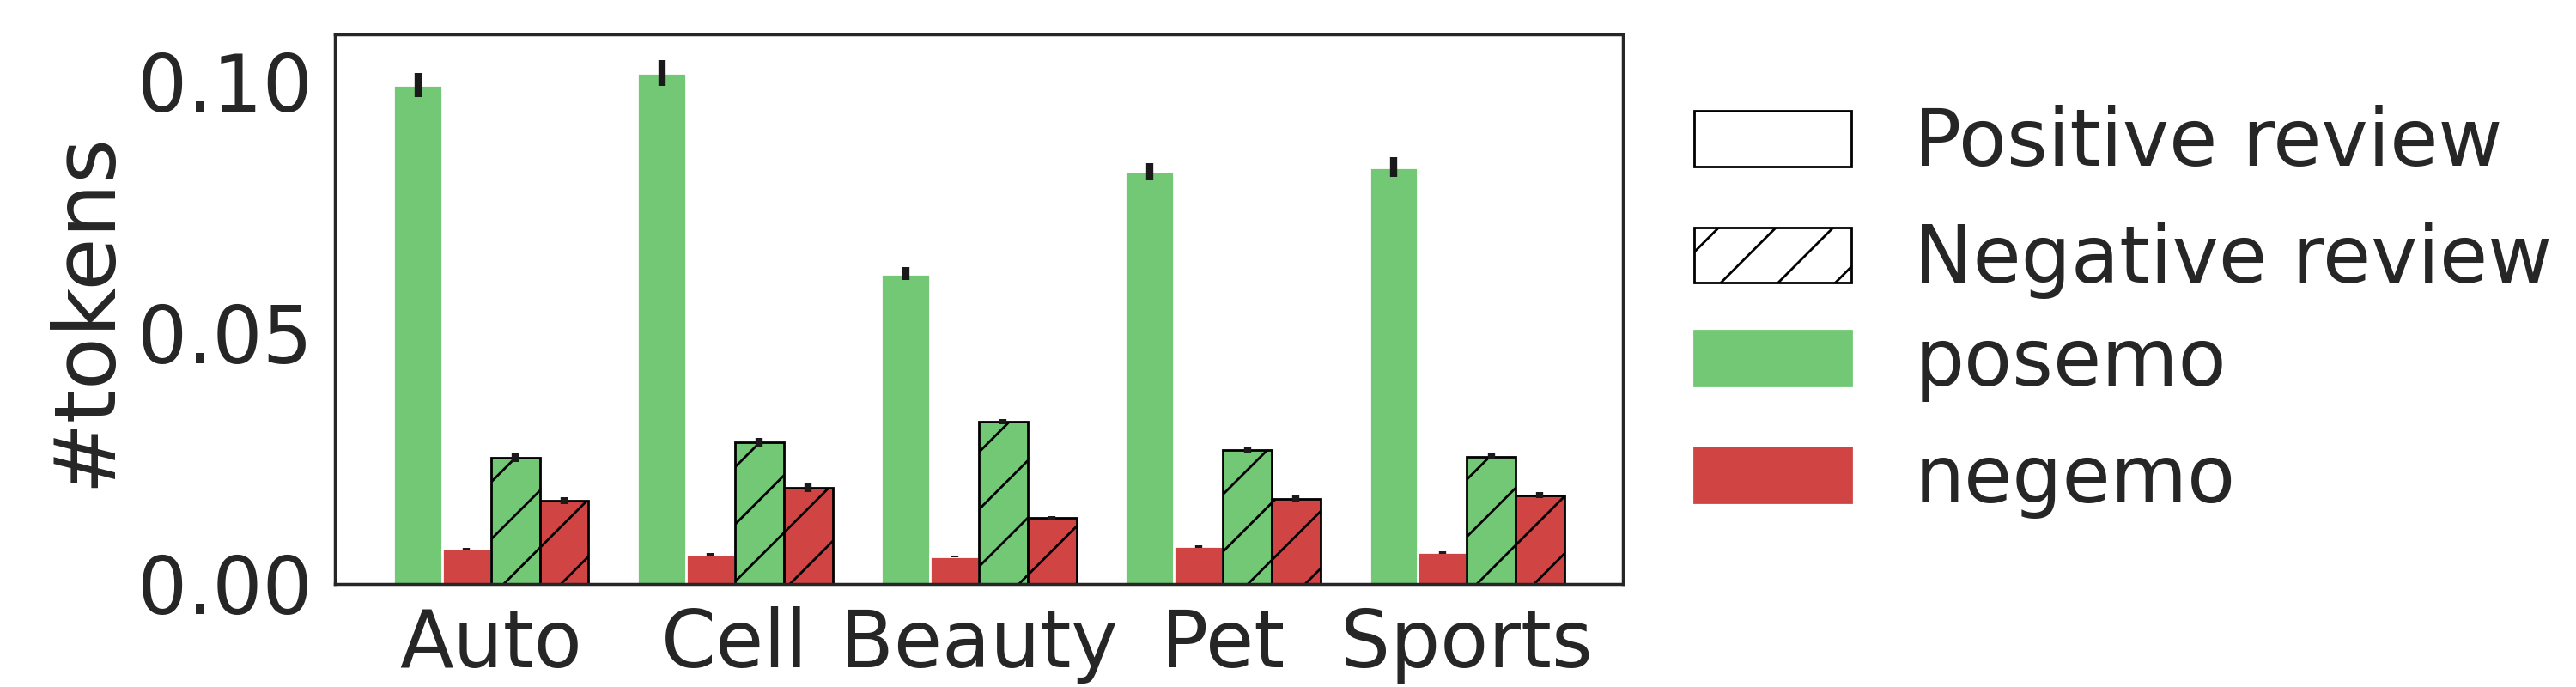

Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_word_level_non_amz


<IPython.core.display.Javascript object>


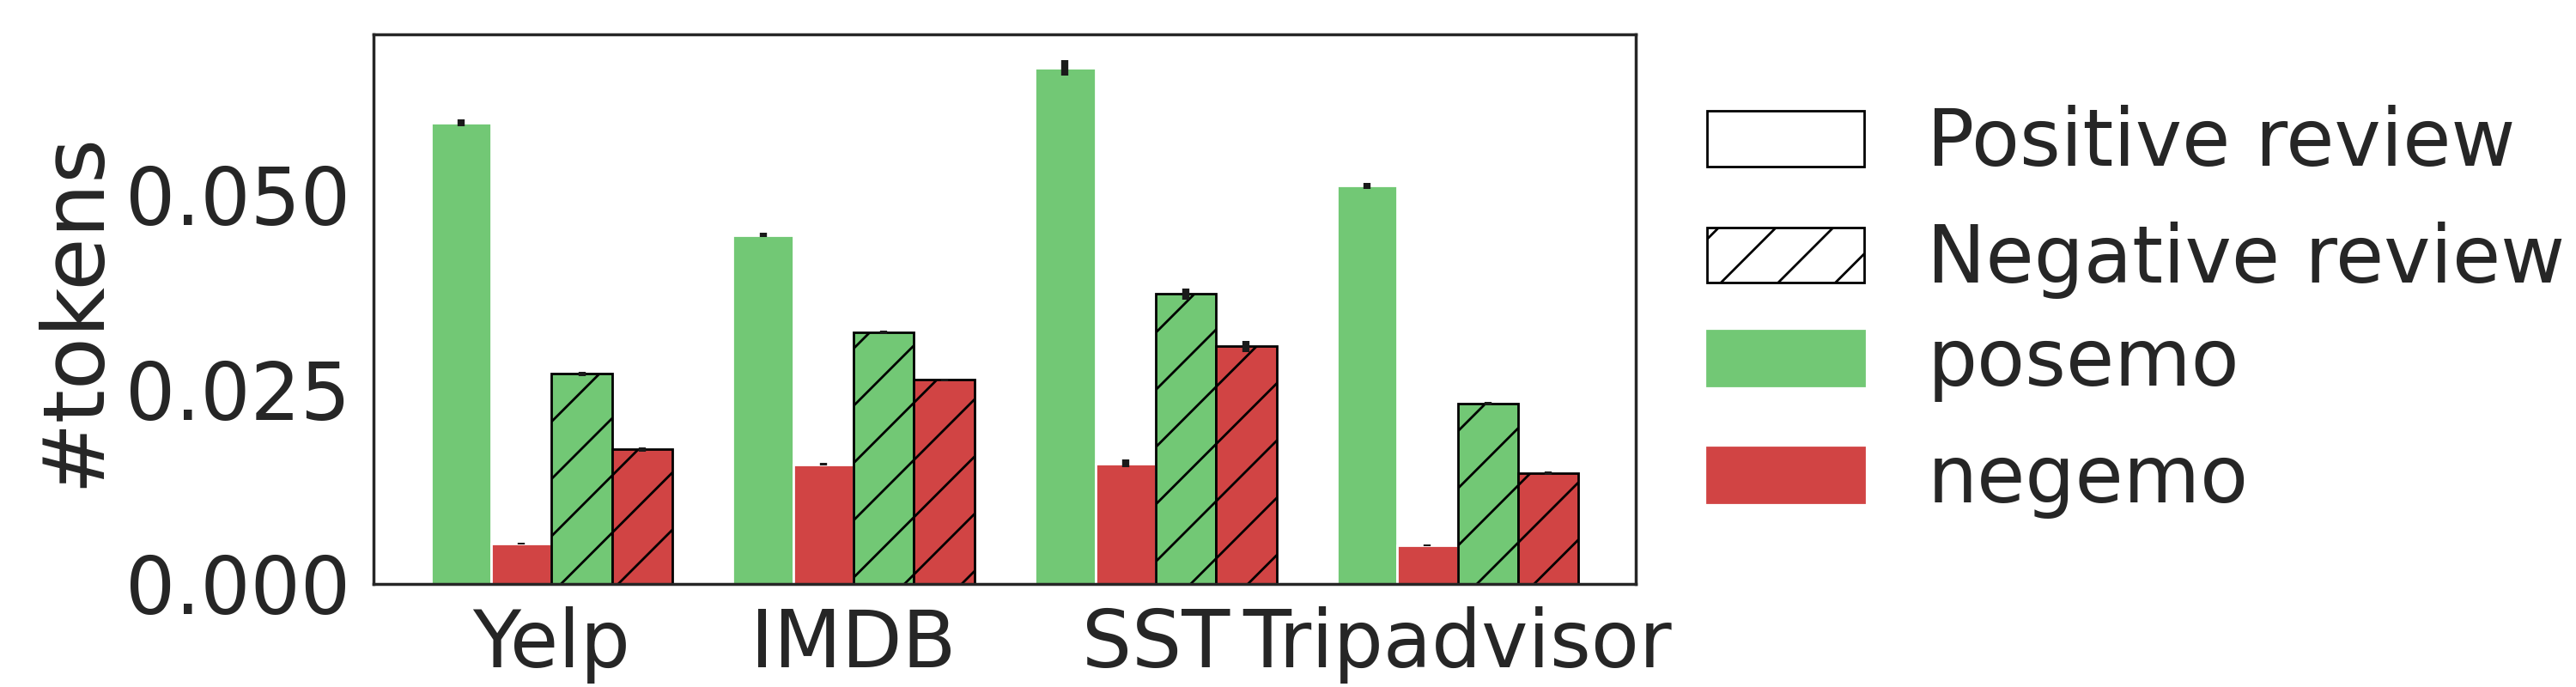

Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_word_level_amz


<IPython.core.display.Javascript object>


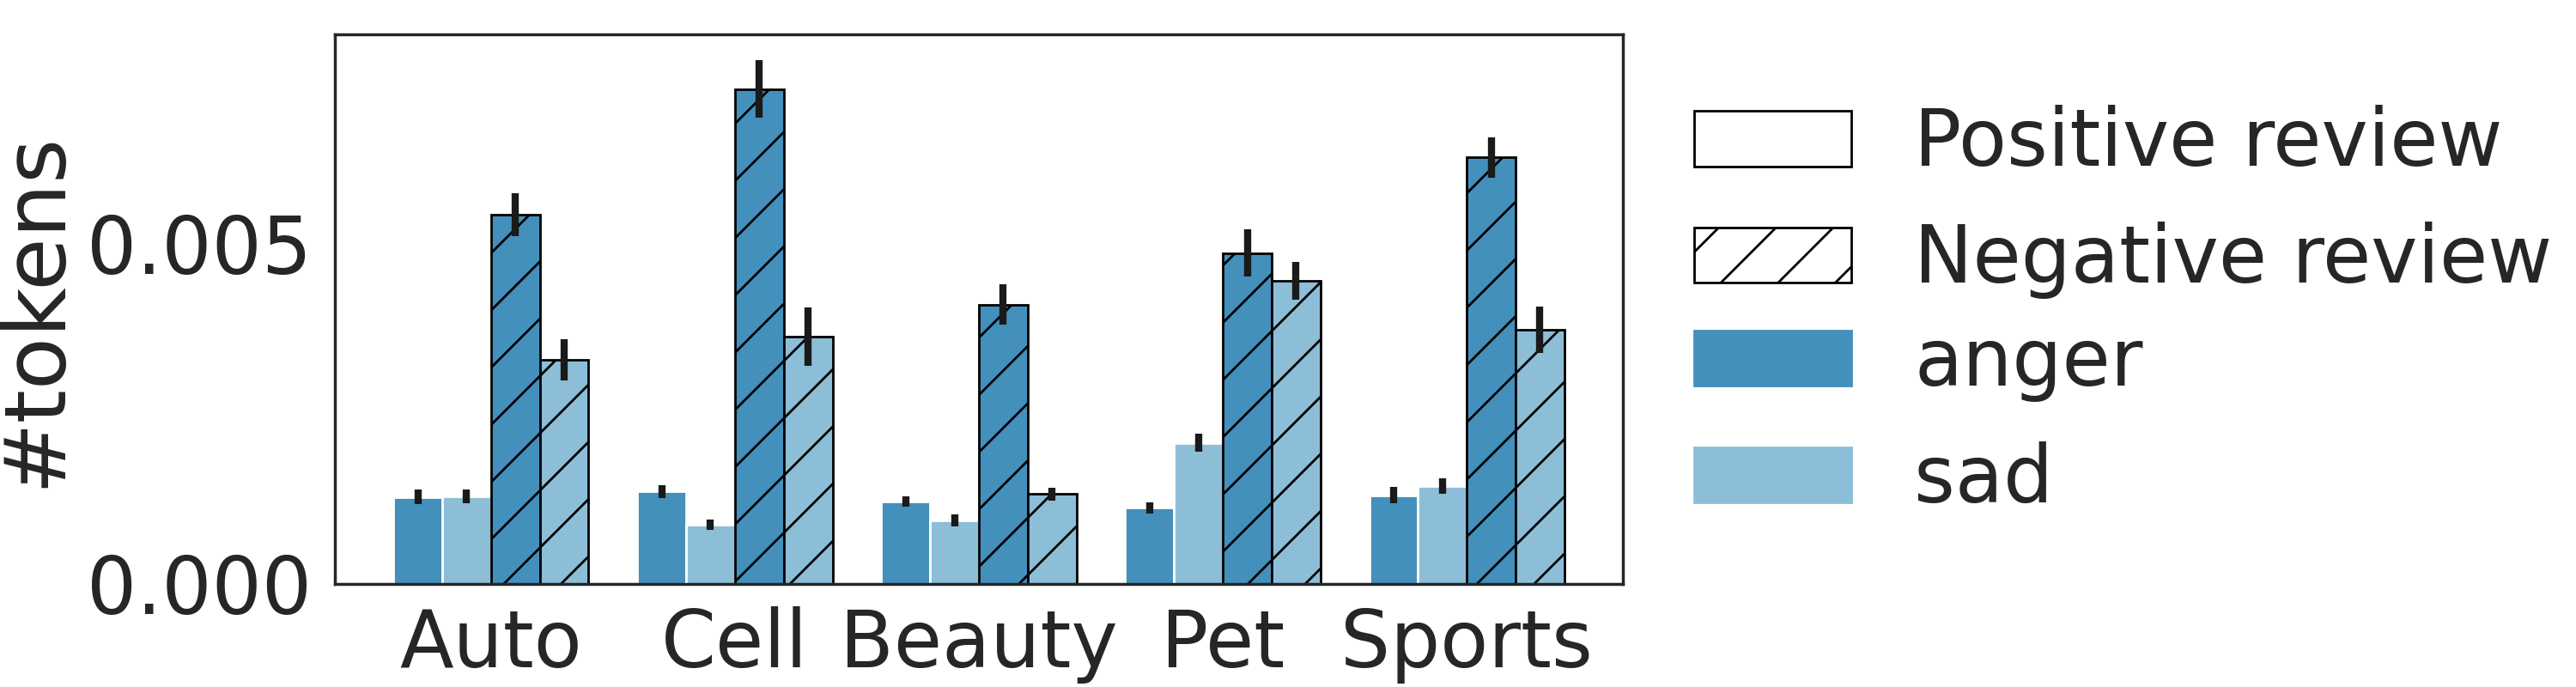

Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_word_level_non_amz


<IPython.core.display.Javascript object>


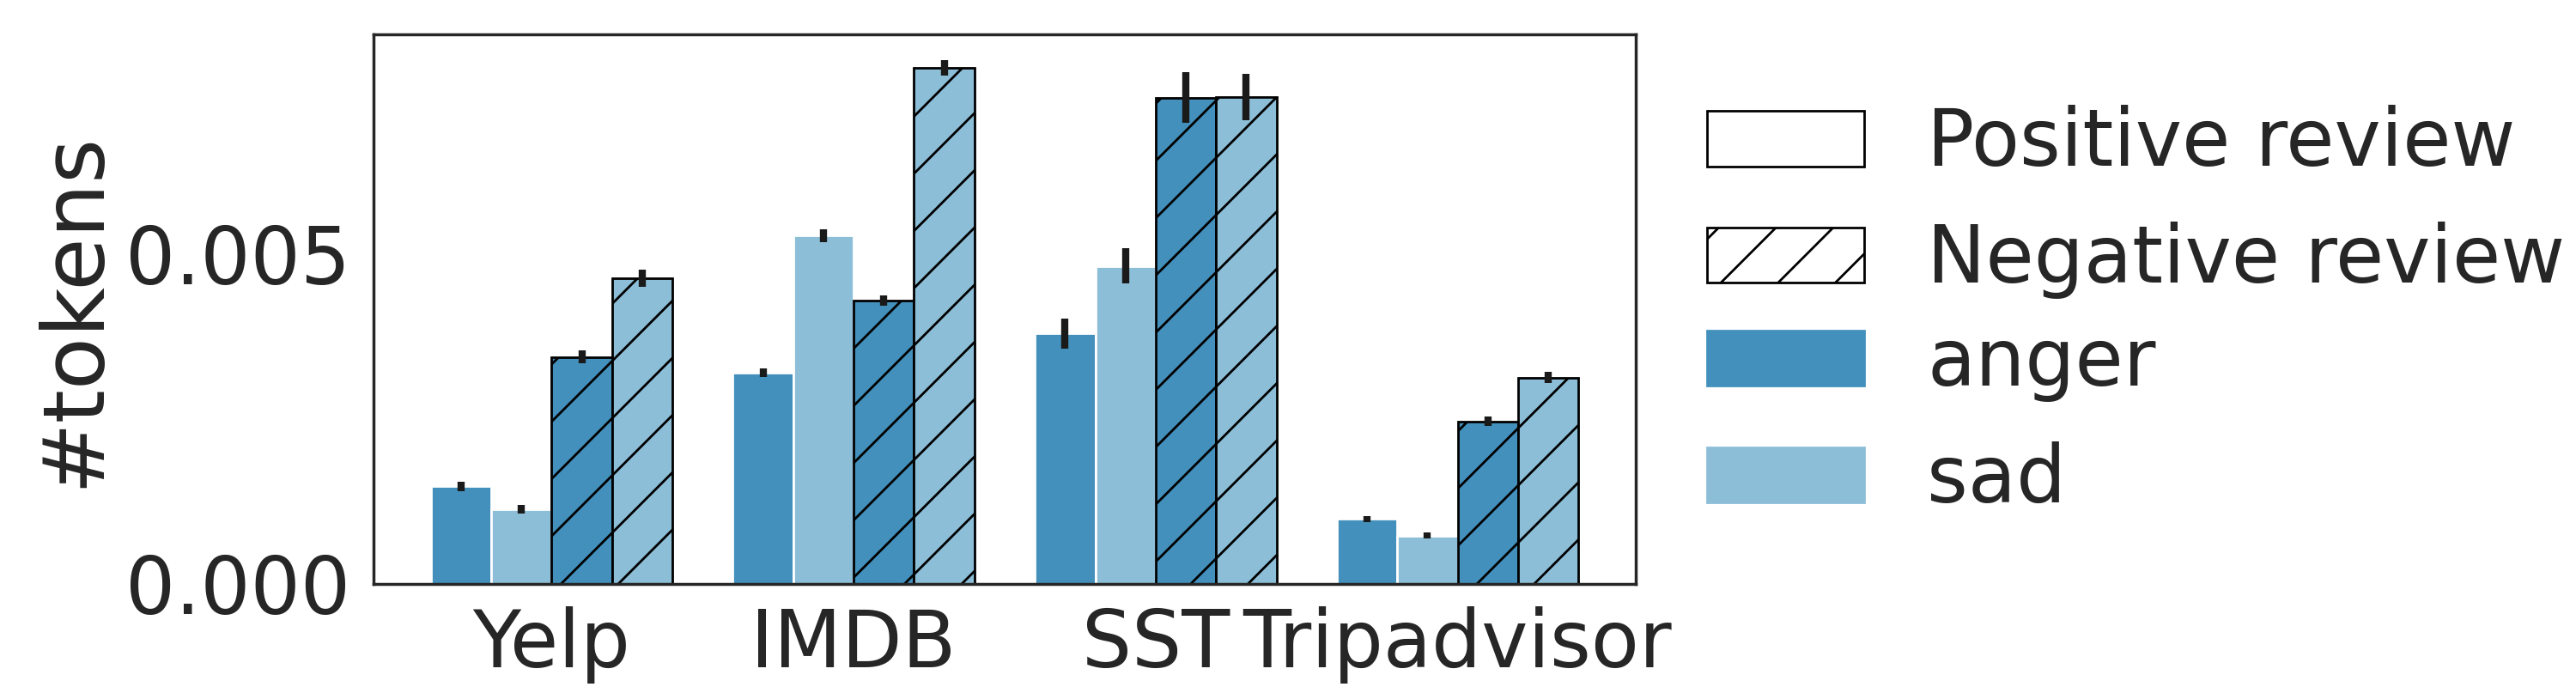

In [7]:
reload(seaborn_plot_util)

saves_dir = os.path.join("../saves", "liwc_dist")
Path(saves_dir).mkdir(parents=True, exist_ok=True)
plot_save_prefix = "liwc_dist"
plot_data = {}
analysis_types = [
    "sent_level", 
    "review_level", 
    "word_level"
]

amazon_names = ['Pet Supplies', 'Luxury Beauty', 'Automotive', 'Cellphones', 'Sports']
reload(seaborn_plot_util)
plot_categories = [
    ["posemo","negemo"], 
    ["anger", "sad"]
]
pickle_save_dir = os.path.join(saves_dir, "all")
Path(pickle_save_dir).mkdir(parents=True, exist_ok=True)
plot_data = pickle.load(open(os.path.join(pickle_save_dir, "liwc_dist_data.pickle"), "rb"))  
for analysis in analysis_types[2:]:
    plot_data_df = pd.DataFrame(plot_data[analysis])
    plot_data_pos_neg_amz = []
    plot_data_pos_neg_non_amz = []
    colors =[
        [(114/255, 200/255, 117/255),(209/255, 68/255, 68/255)]*2,
        [(67/255, 144/255, 188/255),(141/255, 190/255, 216/255)]*2,
    ]  
    for idx,plot_cat in enumerate(plot_categories):
        plot_data_cat = plot_data_df[plot_data_df["liwc_category"].isin(plot_cat)]
        plot_data_cat = plot_data_cat.to_dict('records')            
        plot_data_cat_amz, plot_data_cat_non_amz = util.filter_amazon(plot_data_cat)

        seaborn_plot_util.draw_grouped_barplot_four_subbars(plot_data_cat_amz, "name", "value", 
            "review category", "liwc_category", 
            os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), 
            position=(0.13, 0.15, 0.5, 0.8),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=True,
            colors = colors[idx])
        
        seaborn_plot_util.draw_grouped_barplot_four_subbars(plot_data_cat_non_amz, "name", "value", 
            "review category", "liwc_category",
            os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_non_amz"),
            figsize=(15, 4), 
            position=(0.145, 0.15, 0.49, 0.8),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=False,
            colors = colors[idx])
        

Saving the plot in  ../saves/liwc_dist/liwc_dist_negation_posemo_negation_negemo_word_level_amz


<IPython.core.display.Javascript object>


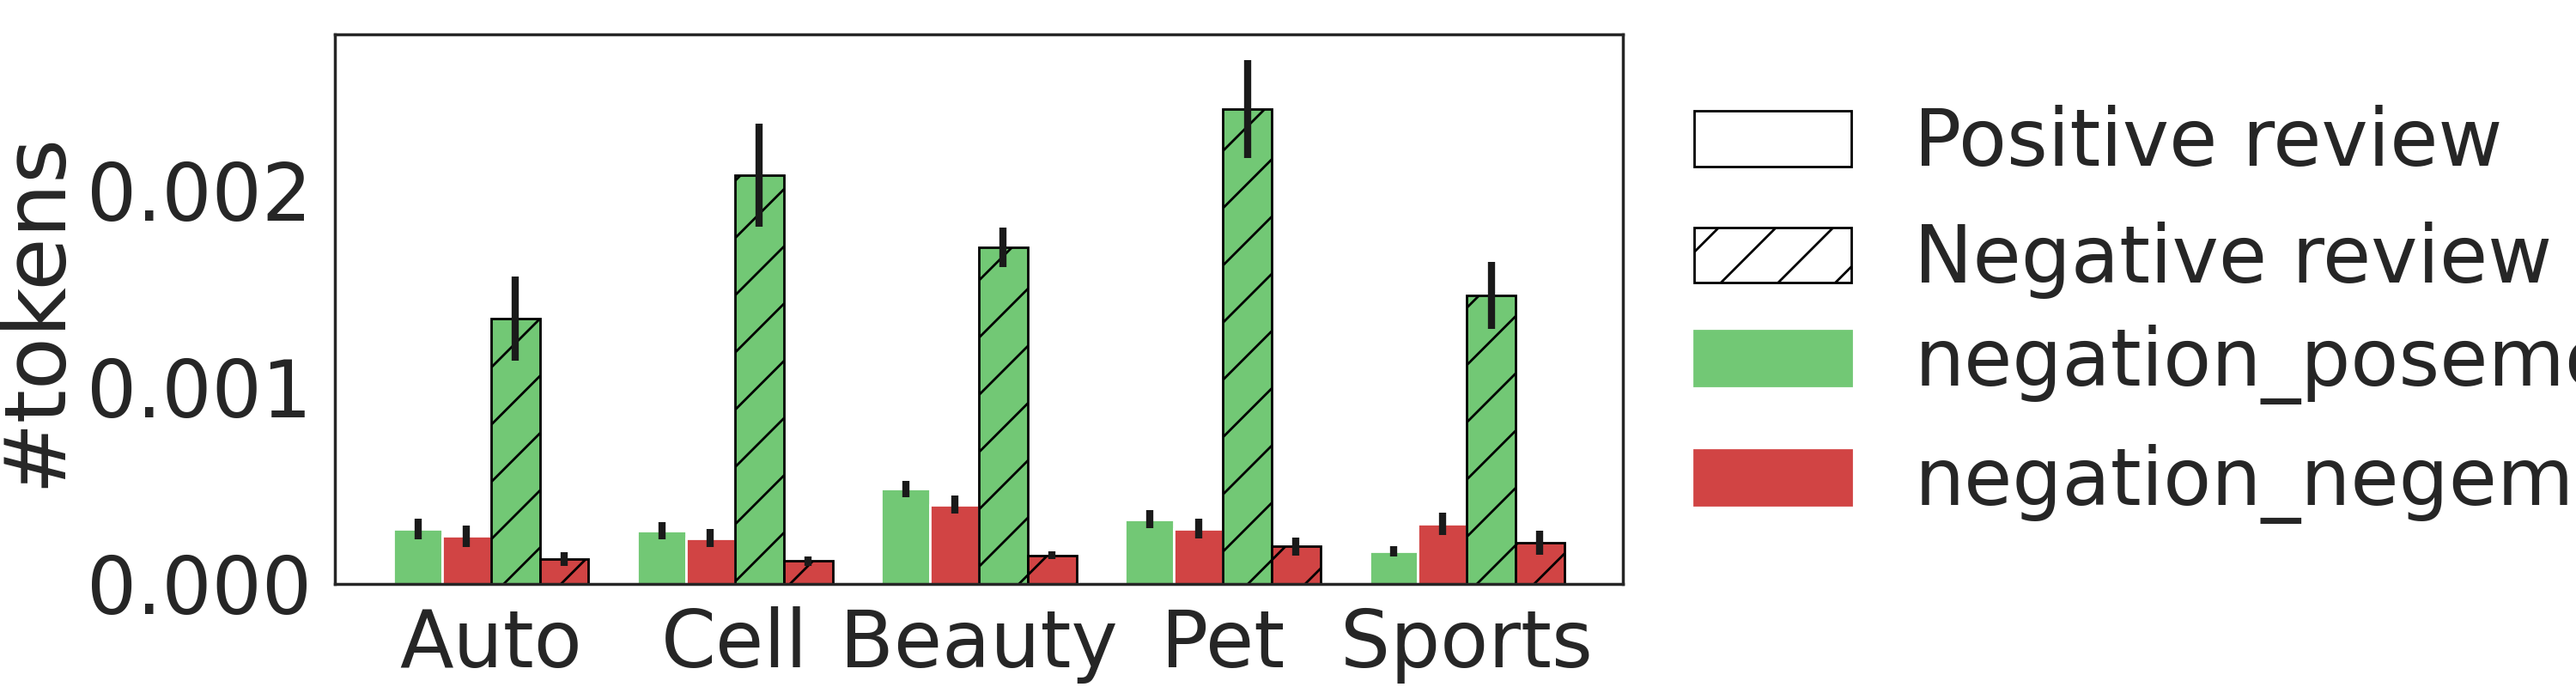

Saving the plot in  ../saves/liwc_dist/liwc_dist_negation_posemo_negation_negemo_word_level_non_amz


<IPython.core.display.Javascript object>


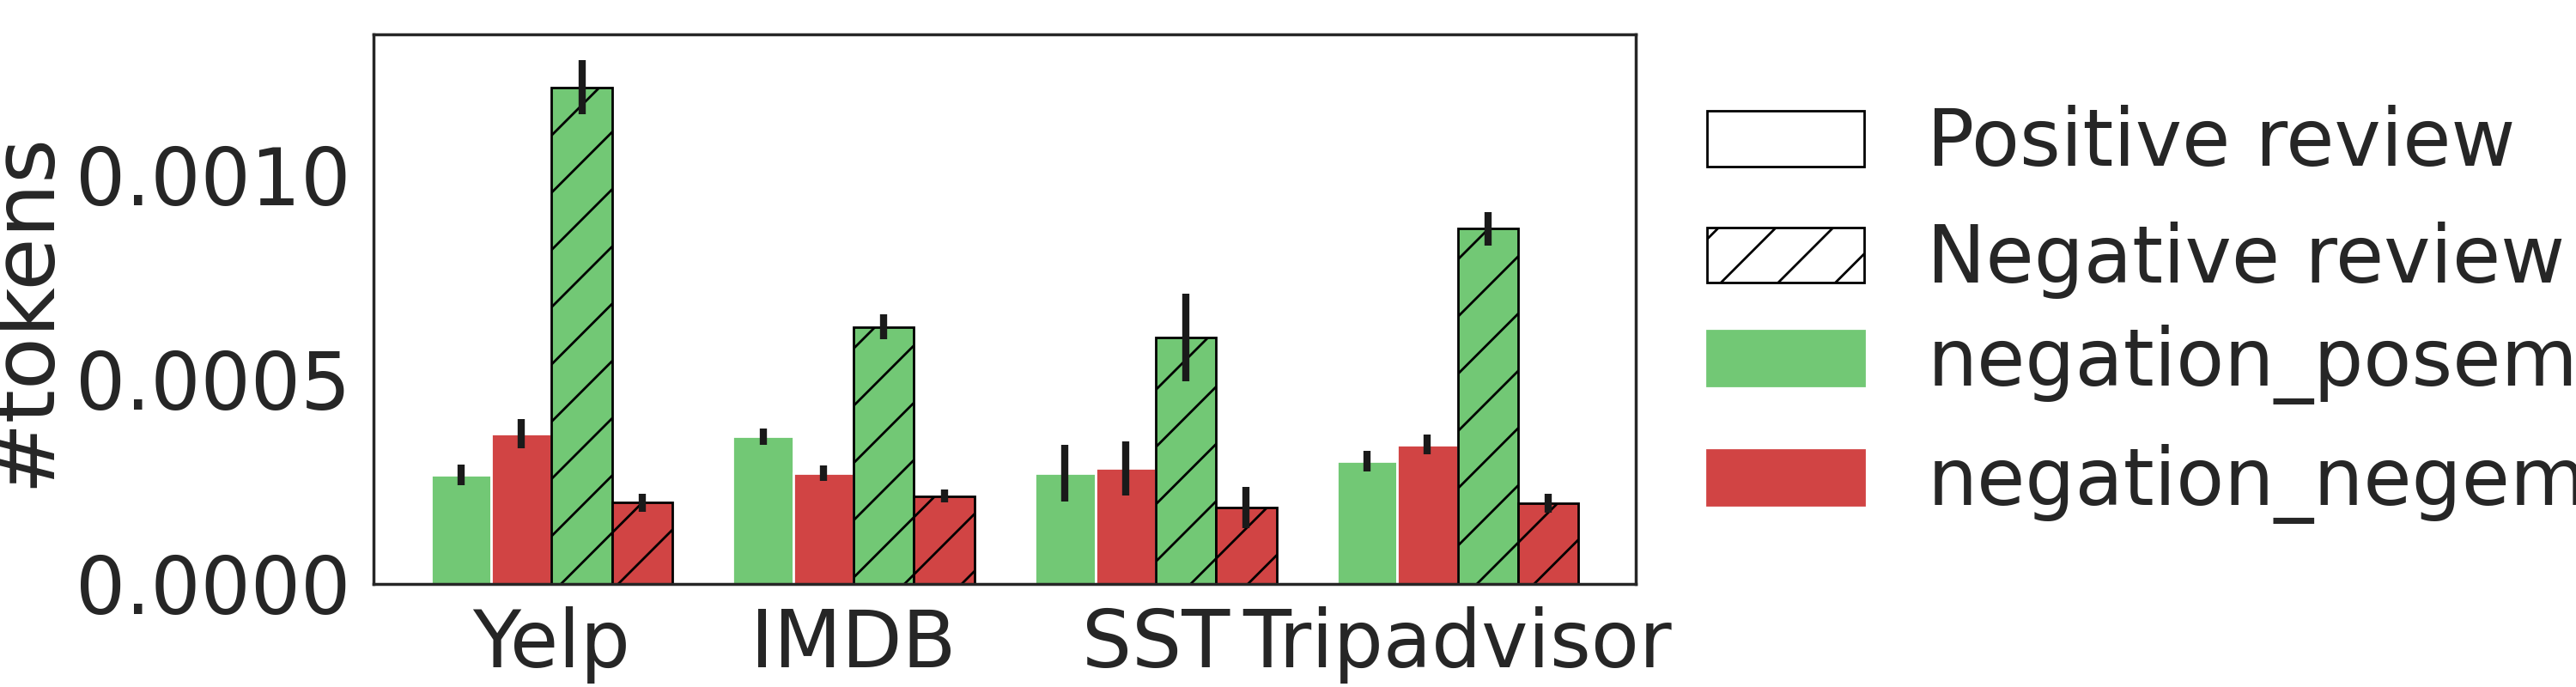

In [8]:
saves_dir = os.path.join("../saves", "liwc_dist")
Path(saves_dir).mkdir(parents=True, exist_ok=True)
plot_save_prefix = "liwc_dist"
plot_data = {}
analysis_types = [
    "sent_level", 
    "review_level", 
    "word_level"
]

amazon_names = ['Pet Supplies', 'Luxury Beauty', 'Automotive', 'Cellphones', 'Sports']
reload(seaborn_plot_util)
plot_categories = [
    ["negation_posemo","negation_negemo"], 
#     ["anger", "sad"]
]
pickle_save_dir = os.path.join(saves_dir, "all")
Path(pickle_save_dir).mkdir(parents=True, exist_ok=True)
plot_data = pickle.load(open(os.path.join(pickle_save_dir, "liwc_dist_negation_data.pickle"), "rb"))  
for analysis in analysis_types[2:]:
    plot_data_df = pd.DataFrame(plot_data[analysis])
    plot_data_pos_neg_amz = []
    plot_data_pos_neg_non_amz = []
    colors =[
        [(114/255, 200/255, 117/255),(209/255, 68/255, 68/255)]*2,
        [(67/255, 144/255, 188/255),(141/255, 190/255, 216/255)]*2,
    ]  
    for idx,plot_cat in enumerate(plot_categories):
        plot_data_cat = plot_data_df[plot_data_df["negation_category"].isin(plot_cat)]
        plot_data_cat = plot_data_cat.to_dict('records')            
        plot_data_cat_amz, plot_data_cat_non_amz = util.filter_amazon(plot_data_cat)

        seaborn_plot_util.draw_grouped_barplot_four_subbars(plot_data_cat_amz, "name", "value", 
            "review category", "negation_category",
            os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), 
            position=(0.13, 0.15, 0.5, 0.8),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=True,
            colors = colors[idx])
        
        seaborn_plot_util.draw_grouped_barplot_four_subbars(plot_data_cat_non_amz, "name", "value", 
            "review category", "negation_category",
            os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_non_amz"),
            figsize=(15, 4), 
            position=(0.145, 0.15, 0.49, 0.8),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=False,                                                
            colors = colors[idx])
        